In [1]:
12

12

In [2]:
# 머신러닝 구조(패턴)
# 데이터 수집 -> 정제/EDA -> 전처리 -> 데이터 분리 -> 모델 선정 -> 학습 -> 평가 -> 피드백 후 재학습 or모델변경 or 데이터 변경(전처리)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# 1. 데이터 수집 및 데이터 전처리(모델에 학습할 데이터 준비)
# 기본 데이터를 학습 데이터와 테스트데이터로 8:2 준비
# 학습 데이터 X_train(feature), y_train(label) / 테스트 데이터 X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(
    iris_data, iris_label, 
    train_size=0.8, # 80% 학습 데이터 사용
    shuffle=False,  # 무작위 섞음 옵션
    stratify=iris_data.label, # 라벨데이터로 비율을 맞추겠다
    random_state=11 # np.random.seed()랑 동일 # 테스트시 재현성 확보를 위해 교정결과로 지정5기
    )

# 2. 모델 준비
model = LinearRegression()

# 3. 학습 (준비해놓은 학습데이터 사용)
model.fit(X_train, y_train) 

# 4. 예측 (준비해놓은 테스트데이터 사용)
y_pred = model.predict(X_test)

# 5. 평가
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print(mse)
print(r2)

# 6. 시각화 
# #  결과 및 시각화



NameError: name 'train_test_split' is not defined

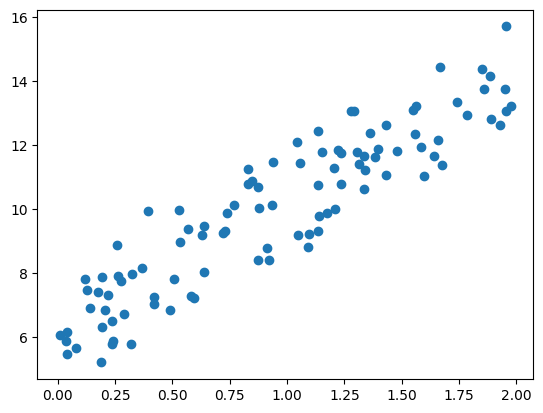

In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1) # 0~2까지의 랜덤값 100개
y = 6 + 4 * X + np.random.randn(100, 1) # y= 6+4x+잡음(Random Noise) 형태로 생성

# 데이터 시각화
plt.scatter(X, y)
plt.show()


6.2221510774471165


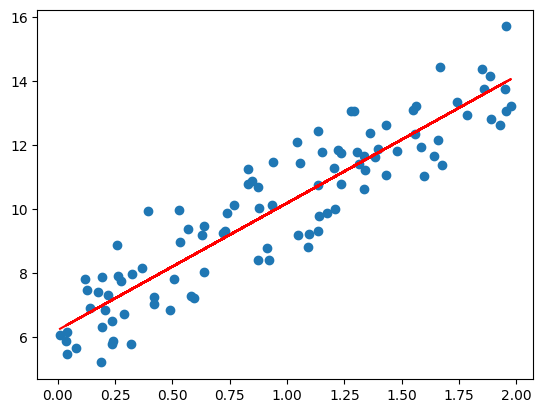

In [ ]:

# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)  # 샘플수
    cost = np.sum(np.square(y - y_pred)) / N    # 평균 제곱 오차
    return cost

# 가중치(w1, w0) 업데이트 함수 정의
def get_weight_update(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    y_pred = np.dot(X, w1.T) + w0   # 예측값 계산
    diff = y - y_pred               # 오차 계산 

    w0_factors = np.ones((N, 1))    # w0 업데이트하는 상수 1배열

    w1_update = -(2 / N) * learning_rate * (np.dot(X.T, diff))  # w1 값 업데이트 
    w0_update = -(2 / N) * learning_rate * (np.dot(w0_factors.T, diff)) # w0 업데이트 값 저장

    return w1_update, w0_update

# 경사 하강법 함수 정의
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1, 1))   # 초기 w0값 설정
    w1 = np.zeros((1, 1))   # 초기 w1값 설정

    # 가중치 업데이트 값 계산
    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update # w1 업데이트 적용
        w0 = w0 - w0_update # w0 업데이트 적용

    return w1, w0

# 경사 하강법 실행 및 결과 확인
w1, w0 = gradient_descent_steps(X, y, iters=10000)
print(w0[0, 0])  # w0 결과 출력

# 예측값 계산
y_pred = w1[0, 0] * X + w0

# 예측 결과 시각화
plt.scatter(X, y)   # 원본 데이터
plt.plot(X, y_pred, color='r') # 경사하강법으로 학습된 직선
plt.show()

In [ ]:
123

123

1. 데이터 만들고
2. 선형 모델 만들기
3. 손실 계산
4. 기울기 구하기
5. 파라미터 업데이트
6. 수렴할 때까지 반복

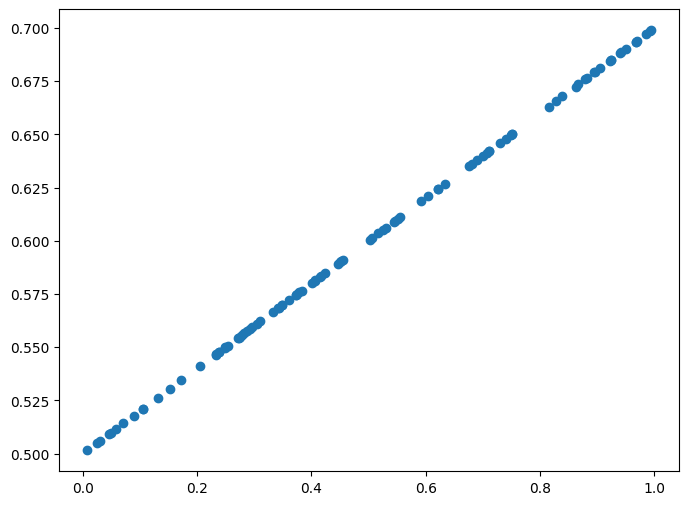

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.random.rand(100) # 0~1사이에 데이터 100개
Y = 0.2 * X + 0.5       # 정답 Y (기울기 0.2, 절편 0.5인 직선)

# 시각화
plt.figure(figsize=(8,6))
plt.scatter(X,Y) # 산정도 플롯

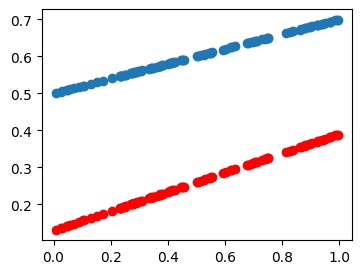

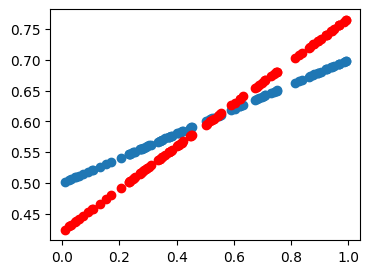

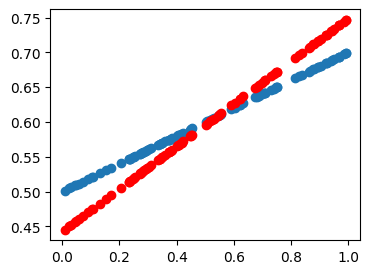

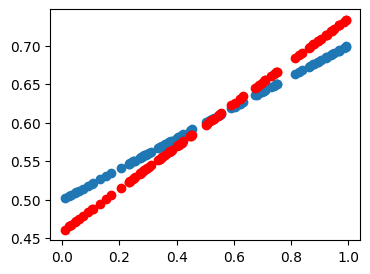

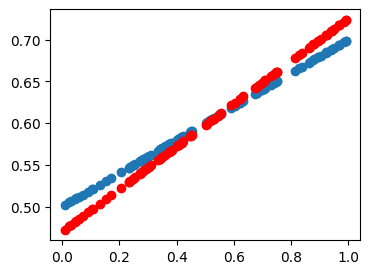

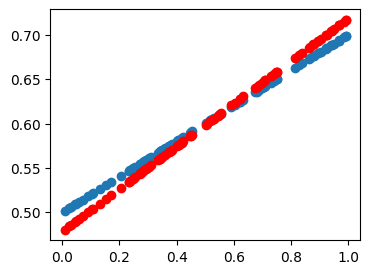

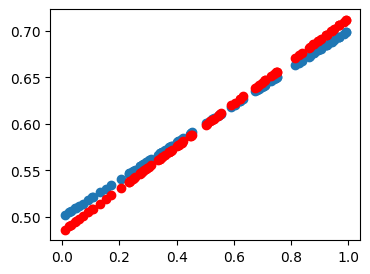

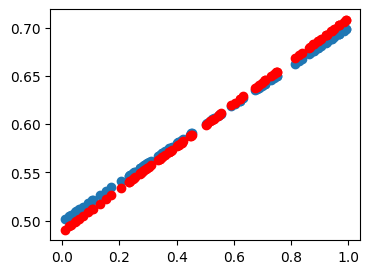

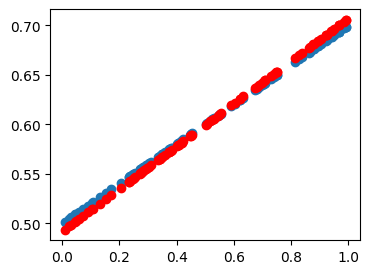

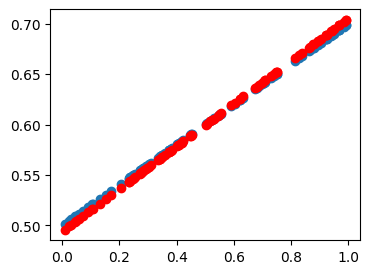

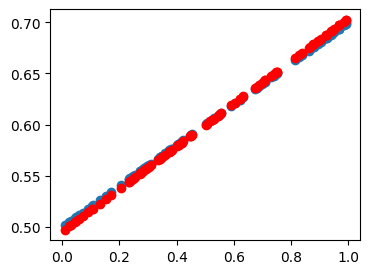

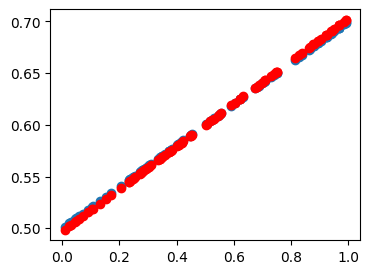

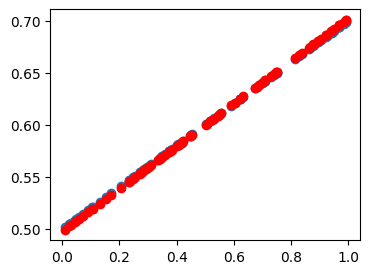

W 0.20376215372297407
b 0.4979650639597424


In [ ]:
W = np.random.uniform(-1,1) # 가중치 w를 -1~1 사이 랜덤값으로 초기화
b = np.random.uniform(-1,1) # 가중치 b를 -1~1 사이 랜덤값으로 초기화

def plot_read(pred,y):
    plt.figure(figsize = (4,3))
    plt.scatter(X,y)                # 실제 데이터
    plt.scatter(X,pred,color='r')   # 예측 값(빨간 점)
    plt.show()

# 경사하강법을 통한 학습
lr = 0.5

# 경사하강법 사용해서 가중치와 편향을 업데이트하며 학습 진행
for epoch in range(300):
    y_pred =W * X+b     # 현재 W,b로 예측값 계산 
    
    error = np.abs(y_pred -Y).mean() # 예측값과 실제값의 평균 절대 오차(MAE)
    
    w_grad = lr * ((y_pred - Y)*X).mean() # W에 대한 기울기 계산 후 학습률 곱하기 
    b_grad = lr * (y_pred - Y).mean() # b에 대한 기울기 계산 후 학습률 곱하기 

    W = W - w_grad # 가중치 W를 경사하강법으로 업데이트
    b = b - b_grad # b에 대한 경사하강법으로 업데이트
    
    # 오차가 충분히 작아지면 반복 중단 (조기중단) -> 스케쥴러
    if error <0.001:    
        break

    if epoch % 10 == 0:     # 10번 애폭마다
        y_pred = W* X+b     # 최신 w와 b로 다시 예측
        plot_read(y_pred,Y) # 예측 결과를 시각화

# 최종 학습된 가중치와 편향 확인 
print('W',W)    # 학습된 기울기 w
print('b',b)    # 학습된 편향 b


In [9]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


기울기 (coefficient) : 2.0
절편 (intercept) : -0.20000000000000018
MSE: 0.15999999999999992
R2 Score: 0.9803921568627451


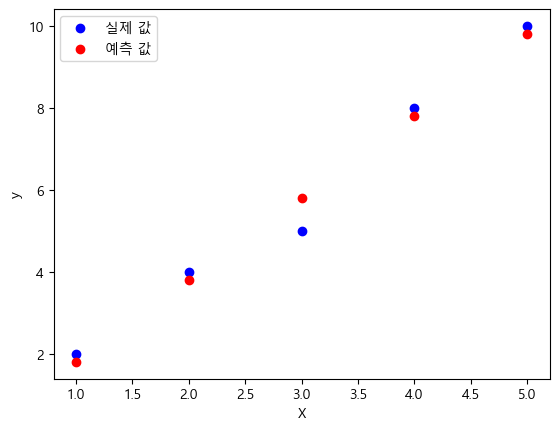

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #선형 회귀 모델
from sklearn.metrics import mean_squared_error,r2_score # 평가지표 

# 데이터 생성
X = np.array([[1],[2],[3],[4],[5]]) # 입력값(2차원 형태)
y = np.array([2,4,5,8,10])          # 실제 출력값

# print(X.shape)
# print(y.shape)

model = LinearRegression()
model.fit(X,y)

# 예측 값
y_pred = model.predict(X)
y_pred

# 평가 지표 계산
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

print(f"기울기 (coefficient) : {model.coef_[0]}") # 학습된 기울기 W 출력
print(f"절편 (intercept) : {model.intercept_}") # 학습된 절편 b 출력
print(f"MSE: {mse}")    # MSE 평균 제곱 오차
print(f"R2 Score: {r2}") # R2 스코어

# 결과 시각화
plt.scatter(X,y, color='b',label = '실제 값')
plt.scatter(X,y_pred, color='r',label = '예측 값')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()



In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀  모델
from sklearn.metrics import mean_squared_error # MSE(평균 제곱 오차) 평가 지표

# 데이터 생성
X = np.array([[1, 2100], [2, 2500], [3, 1800], [4, 2200], [5, 1700]])
y = np.array([500, 550, 480, 530, 475])

# model생성
model = LinearRegression()
model.fit(X,y)

# 예측값 계산
y_pred = model.predict(X)

print(y)
print()
print(y_pred)

# 평가 지표 계산
mse = mean_squared_error(y,y_pred)

print(f"기울기 (coefficient) : {model.coef_}") # 학습된 기울기 W 출력
print(f"절편 (intercept) : {model.intercept_}") # 학습된 절편 b 출력
print(f"MSE: {mse}")    # MSE 평균 제곱 오차


[500 550 480 530 475]

[500.77319588 551.08247423 477.78350515 528.09278351 477.26804124]
기울기 (coefficient) : [5.36082474 0.11237113]
절편 (intercept) : 259.4329896907218
MSE: 3.0927835051547214
R2 Score: 0.9803921568627451


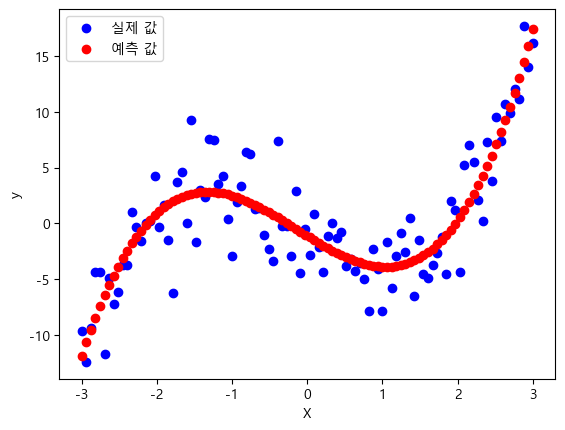

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
# X =np.linspace(-3,3,100)
X =np.linspace(-3,3,100).reshape(-1,1) # -3~3 사이의 값을 100개 생성 후 2차원 배열로 변환
# X.shape
y = X**3 - 4*X + np.random.randn(100,1)*3 # 비선형 함수 + 노이즈 y 생성

# 다항 특성 변환 (차수 3)
poly_features  = PolynomialFeatures(degree=3,include_bias=False) # DEGREE3 =>X,X^2,X^3 방식으로 생성
X_poly = poly_features.fit_transform(X) # X를 다항 특성으로 변환

# 선형회귀 모델 학습
model = LinearRegression()
model.fit(X_poly,y)

# 예측값 계산
y_pred = model.predict(X_poly)

# 결과 시각화
plt.scatter(X,y, color='b',label = '실제 값')
plt.scatter(X,y_pred, color='r',label = '예측 값')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


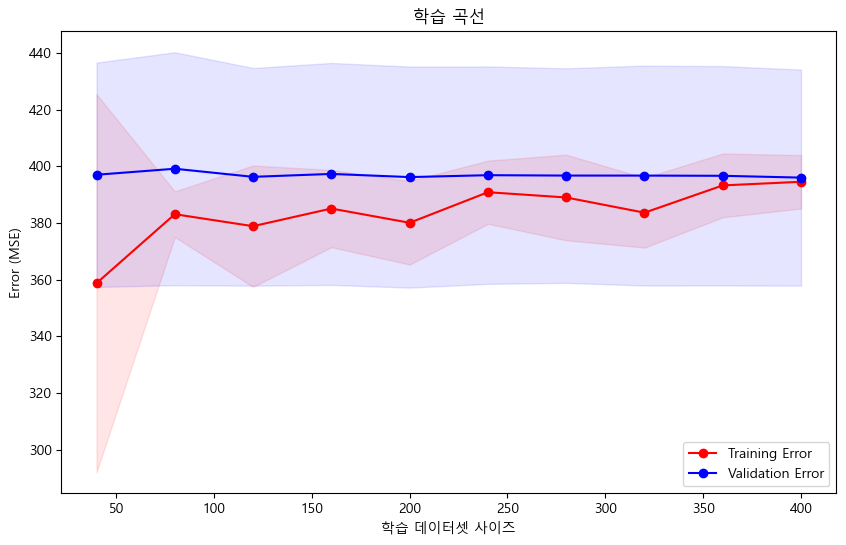

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve # 학습 곡선 계산 함수
from sklearn.linear_model import LinearRegression # 선형회귀모델
from sklearn.datasets import make_regression # 회귀용 예제 데이터셋

# 데이터 생성 (샘플 500개, 특징 1개, 노이즈 포함)
X,y = make_regression(n_samples=500, n_features=1, noise=20, random_state=42)

# 학습 곡선 계산
train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(),                 # 선형 회귀 모뎅
    X,y,                                # 입력(X),타겟(y)
    cv=5,                               # 교차검증 5-fold
    scoring='neg_mean_squared_error',       # MSE 사용
    train_sizes=np.linspace(0.1,1.0,10) # 0.1 ~ 1.0까지 10단계로 점자적으로 증가
)

# 평균과 표준편차 계산
train_mean = -train_scores.mean(axis=1) # train scores 평균(MSE). 음수를 양수로 변경
train_std = train_scores.std(axis=1)    # train scores 표준편차
val_mean = -val_scores.mean(axis=1)     # validation scores 평균(MSE) 음수를 양수로 변경
val_std = val_scores.std(axis=1)        # validation scores 표준편차

# 학습곡선 시각화
plt.figure(figsize=(10,6))
plt.plot(train_sizes,train_mean, 'o-',label='Training Error', color='r')
plt.plot(train_sizes,val_mean, 'o-',label='Validation Error', color='b')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color ='red')  # 훈련 에러 신뢰구간
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="blue")          # 검증 에러 신뢰구간
plt.xlabel("학습 데이터셋 사이즈")
plt.ylabel("Error (MSE)")
plt.title("학습 곡선")
plt.legend()
plt.show()

In [ ]:
import math

p = [1, 2]
q = [4, 6]

distance = math.dist(p, q)
print(distance)   # 출력: 5.0

5.0


In [ ]:
# 맨해튼 거리
p = [1, 2]
q = [4, 6]

manhattan = sum(abs(pi - qi) for pi, qi in zip(p, q))
print(manhattan)   # 출력: 7

7


In [ ]:
import numpy as np

p = np.array([1, 2])
q = np.array([2, 3])

cos_sim = np.dot(p, q) / (np.linalg.norm(p) * np.linalg.norm(q))
print(round(cos_sim, 3))   # 출력: 0.983

0.992


In [ ]:
import numpy as np
from scipy.spatial.distance import mahalanobis

# 샘플 데이터(공분산 계산용)
data = np.array([
    [1, 2],
    [2, 2],
    [3, 4]
])

p = np.array([1, 2])
q = np.array([3, 4])

cov = np.cov(data.T)               # 공분산 행렬
inv_cov = np.linalg.inv(cov)       # 공분산 역행렬

dist = mahalanobis(p, q, inv_cov)
print(round(dist, 3))  # 예: 2.0

2.0


In [ ]:
# 시그모이드 함수
import numpy as np

theta = np.array([0.5, 1.0])   # 가중치
x = np.array([1, 2])           # 입력 데이터

z = theta @ x                  # 선형 조합 (θ^T x)
sigmoid = 1 / (1 + np.exp(-z)) # 시그모이드 함수

print(round(sigmoid, 3))  # 예: 0.953

0.924


In [ ]:
import numpy as np

# 간단한 데이터 (x: 특성, y: 레이블)
x = np.array([0.2, 0.8, 1.5])
y = np.array([0, 1, 1])

theta = 1.0                            # 임의 가중치
z = theta * x                          # 선형 결합 z = theta * x
h = 1 / (1 + np.exp(-z))               # 시그모이드 -> 예측 확률 h(x)

# Log Loss 계산
log_loss = -np.mean(y*np.log(h) + (1-y)*np.log(1-h)) # 로지스틱 회귀의 비용함수
print(round(log_loss, 3))              # 예: 0.391(계산된 손실값)

# 예측 (threshold=0.5)
pred = (h >= 0.5).astype(int)           # 0.5 이상이면 1, 이하면 0
print(pred)                             # 예: [0 1 1]

0.457
[1 1 1]


In [ ]:
import numpy as np

# 클래스 3개에 대한 점수(θᵀx 값)
scores = np.array([2.0, 1.0, 0.1]) # 각 클래스의 점수

# 소프트맥스 함수
exp_scores = np.exp(scores) # scores를 지수 변환
softmax = exp_scores / np.sum(exp_scores)   # 

print(np.round(softmax, 3))   # 예: [0.659 0.242 0.099]

[0.659 0.242 0.099]


In [ ]:
import numpy as np

# 입력 벡터
x = np.array([1.2, 0.5])

# 각 레이블별 가중치 (3개의 레이블: 액션, 코미디, 드라마)
theta = np.array([
    [1.0, -0.5],   # 액션
    [-0.3, 1.2],   # 코미디
    [0.8, 0.8]     # 드라마
])

# 레이블별 선형 조합 + 시그모이드
z = theta @ x
sigmoid = 1 / (1 + np.exp(-z))

print(np.round(sigmoid, 3))   # 예: [0.777 0.622 0.845]

[0.721 0.56  0.796]


In [ ]:
import numpy as np

x = np.array([1.0, 0.5])   # 입력 특징

# 출력 1: 질병 유무 (이진 분류 → 시그모이드)
theta_disease = np.array([1.2, -0.8])
z1 = theta_disease @ x
disease_prob = 1 / (1 + np.exp(-z1))

# 출력 2: 중증도 (4개 클래스 → 소프트맥스)
theta_severity = np.array([
    [0.5, 1.0],
    [1.0, -0.2],
    [-0.5, 0.7],
    [0.2, 0.1]
])
z2 = theta_severity @ x
exp_scores = np.exp(z2)
severity_prob = exp_scores / np.sum(exp_scores)

print("질병 확률:", round(disease_prob, 3))
print("중증도 확률:", np.round(severity_prob, 3)) 

질병 확률: 0.69
중증도 확률: [0.371 0.336 0.118 0.175]


In [ ]:
import numpy as np

y_true = np.array([1, 0, 1, 1, 0])   # 실제값
y_pred = np.array([1, 0, 0, 1, 0])   # 예측값

TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

accuracy = (TP + TN) / len(y_true)
print("Accuracy:", round(accuracy, 3))   # 예: 0.8

Accuracy: 0.8


In [ ]:
import numpy as np

y_true = np.array([1, 0, 1, 1, 0])  # 정답값
y_pred = np.array([1, 1, 0, 1, 0])  # 모델 예측값

# Confusion Matrix 요소 계산
TP = np.sum((y_true == 1) & (y_pred == 1))  # 2
TN = np.sum((y_true == 0) & (y_pred == 0))  # 1
FP = np.sum((y_true == 0) & (y_pred == 1))  # 1
FN = np.sum((y_true == 1) & (y_pred == 0))  # 1

print(f"TP={TP}, FP={FP}, FN={FN}, TN={TN}")

TP=2, FP=1, FN=1, TN=1


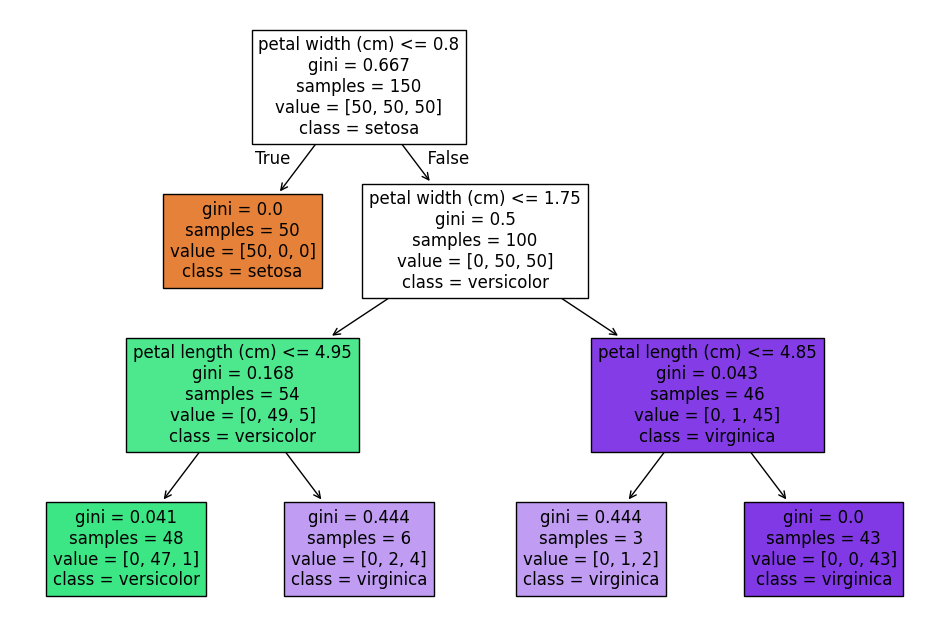

In [ ]:
# 결정트리 시각화

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 데이터 로드 및 모델 학습
iris = load_iris()
X, y = iris.data, iris.target
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

# 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [ ]:
from collections import Counter

# 어떤 리프 노드에 도달한 샘플들의 실제 클래스
leaf_samples = ['A', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A']

counts = Counter(leaf_samples)
total = len(leaf_samples)

probs = {cls: cnt / total for cls, cnt in counts.items()}
print(probs)   # 예: {'A': 0.8, 'B': 0.2}

{'A': 0.8, 'B': 0.2}


In [ ]:
from collections import Counter

# 한 노드에 있는 샘플들의 클래스
node = ['A', 'A', 'B', 'A', 'B', 'A']

counts = Counter(node) # A:4, B:2
total = len(node) # 6

gini = 1 - sum((cnt/total)**2 for cnt in counts.values())
print(round(gini, 3))   # 예: 0.444

0.444


In [ ]:
import math
from collections import Counter

# 한 노드에 있는 샘플의 클래스 구성
node = ['A', 'B', 'B', 'A', 'B', 'A']

counts = Counter(node)
total = len(node)

entropy = -sum((cnt/total) * math.log2(cnt/total) for cnt in counts.values())
print(round(entropy, 3))   # 예: 0.918

1.0


In [ ]:
import math
from collections import Counter

def entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    return -sum((c/total) * math.log2(c/total) for c in counts.values())

# 전체 데이터의 클래스
D = ['A', 'A', 'B', 'A', 'B', 'A']   # 엔트로피 계산
H_D = entropy(D)

print("분할 전 엔트로피 : ",H_D)
# 속성 A로 분할한 경우
Dv1 = ['A', 'A', 'A']   # 예: feature A = 0 그룹
Dv2 = ['B', 'A', 'B']   # 예: feature A = 1 그룹

H_split = (len(Dv1)/len(D)) * entropy(Dv1) + \
          (len(Dv2)/len(D)) * entropy(Dv2)

IG = H_D - H_split

print("분할 후 엔트로피 : ",H_split)
print("정보 이득:", round(IG, 3))

분할 전 엔트로피 :  0.9182958340544896
분할 후 엔트로피 :  0.4591479170272448
정보 이득: 0.459


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 규제 없음 (과적합 가능)
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)
print("규제 없음 정확도:", model1.score(X_test, y_test))

# 최대 깊이 제한
model2 = DecisionTreeClassifier(max_depth=2, random_state=42)
model2.fit(X_train, y_train)
print("max_depth=2 정확도:", model2.score(X_test, y_test))

규제 없음 정확도: 1.0
max_depth=2 정확도: 0.9777777777777777


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import numpy as np

# 회귀용 california housing 데이터 로드
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 규제 없는 회귀 트리
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 첫 번째 테스트 샘플 예측
pred = model.predict([X_test[0]])
print("예측값:", np.round(pred[0], 3))
print("실제값:", y_test[0])

예측값: 0.414
실제값: 0.477


가지치기 없음: 1.0
max_depth=2 가지치기: 1.0


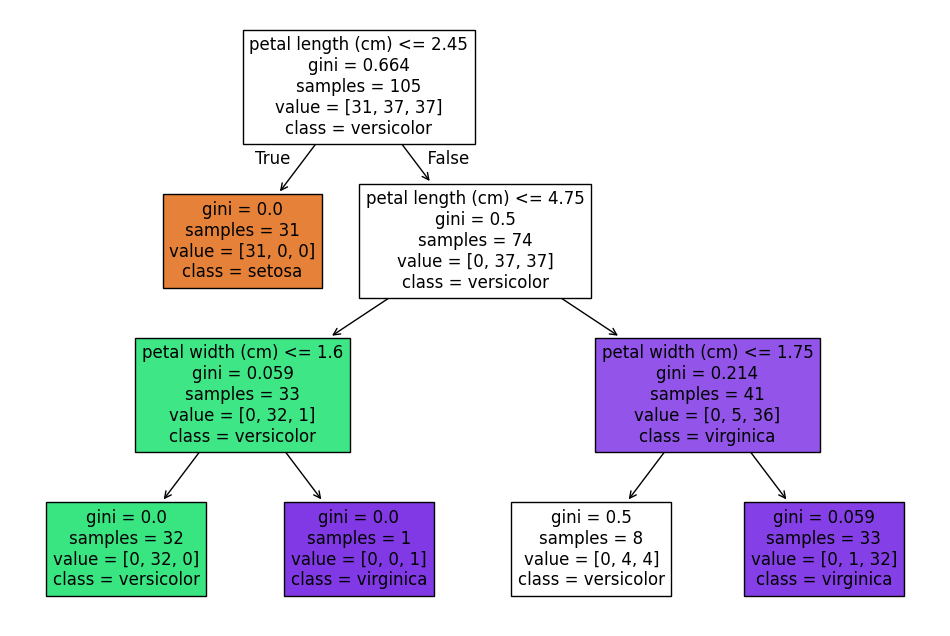

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42 # 재현성 확보를 42번으로 하겠다
)

# 가지치기 없음 (과적합 가능)
model_full = DecisionTreeClassifier(random_state=42)
model_full.fit(X_train, y_train)
print("가지치기 없음:", model_full.score(X_test, y_test))

# plt.figure(figsize=(12, 8))
# plot_tree(model_full, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
# plt.show()


# 사전 가지치기: 트리 깊이 제한
model_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
model_pruned.fit(X_train, y_train)
print("max_depth=3 가지치기:", model_pruned.score(X_test, y_test))
plt.figure(figsize=(12, 8))
plot_tree(model_pruned, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 준비
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 개별 모델
log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svc_clf = SVC(probability=True)

# 투표 기반 분류기
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('dt', tree_clf),
    ('svc', svc_clf)],
    voting='soft'  # soft 또는 hard
)
voting_clf.fit(X_train, y_train)

print("Accuracy:", voting_clf.score(X_test, y_test))

Accuracy: 1.0


In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 베깅 분류기
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,  # 모델 개수
    max_samples=0.8,   # 샘플 크기
    bootstrap=True,    # 복원 추출 여부 (True: 베깅, False: 페이스팅)
    random_state=42
)
bagging_clf.fit(X_train, y_train)
print("Bagging Accuracy:", bagging_clf.score(X_test, y_test))

Bagging Accuracy: 1.0


In [6]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',  # 특성의 일부만 사용
    random_state=42
)
rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))

Random Forest Accuracy: 1.0


In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", gb_clf.score(X_test, y_test))

Gradient Boosting Accuracy: 1.0


In [10]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC(probability=True)) # 회귀로도 쓸수있게?
    ],
    final_estimator=LogisticRegression(),  # 메타 모델
    cv=5  # 교차 검증
)
stacking_clf.fit(X_train, y_train)
print("Stacking Accuracy:", stacking_clf.score(X_test, y_test))
meta_X = stacking_clf.transform(X_test[:5])   # 베이스 모델 예측값(메타 입력)
y_pred = stacking_clf.predict(X_test[:5])     # 최종 예측
print(meta_X)
print(y_pred)


Stacking Accuracy: 1.0
[[4.09968623e-03 8.12343852e-01 1.83556462e-01 0.00000000e+00
  1.00000000e+00 0.00000000e+00 9.41534201e-03 8.59771620e-01
  1.30813038e-01]
 [9.41955389e-01 5.80440306e-02 5.80205260e-07 1.00000000e+00
  0.00000000e+00 0.00000000e+00 9.36537930e-01 4.38480711e-02
  1.96139992e-02]
 [1.58411470e-08 2.09129590e-03 9.97908688e-01 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.91125678e-02 3.75635868e-03
  9.77131073e-01]
 [6.82490236e-03 7.73251430e-01 2.19923668e-01 0.00000000e+00
  1.00000000e+00 0.00000000e+00 1.01085255e-02 8.58722514e-01
  1.31168960e-01]
 [1.59400574e-03 7.51206007e-01 2.47199987e-01 0.00000000e+00
  1.00000000e+00 0.00000000e+00 1.27798057e-02 7.40791033e-01
  2.46429162e-01]]
[1 0 2 1 1]


In [ ]:
def solution(n, k):
    answer = []
    return answer

solution(10,3)

['nami', 'vex']

In [6]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# 데이터 로드
iris = load_iris()
X = iris.data

# PCA 적용 (2차원으로 축소)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("원본 데이터 형태:", X.shape)
print("축소된 데이터 형태:", X_reduced.shape)

# iris
X

원본 데이터 형태: (150, 4)
축소된 데이터 형태: (150, 2)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

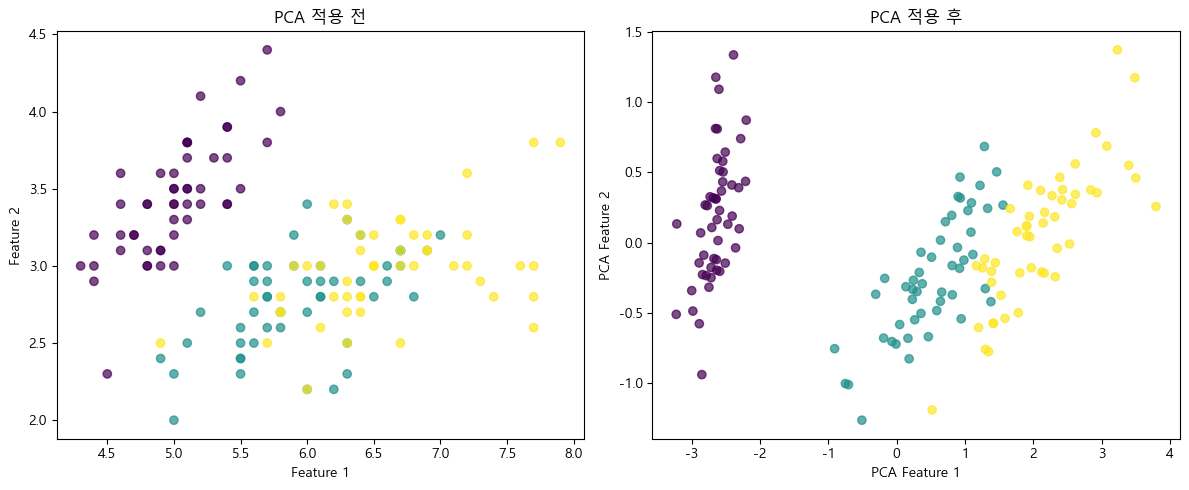

In [11]:
# 시각화해서 한번보기
import matplotlib.pyplot as plt
import numpy as np

y= iris.target  # 클래스 라벨(색상 구분용)
plt.figure(figsize=(12,5))

# PCA 적용 전
plt.subplot(1,2,1)
plt.scatter(X[:, 0],X[:, 1], c=y, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA 적용 전')

# PCA 적용 후
plt.subplot(1,2,2)
plt.scatter(X_reduced[:, 0],X_reduced[:, 1], c=y, alpha=0.7)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('PCA 적용 후')

plt.tight_layout()
plt.show()




In [ ]:
from sklearn.decomposition import KernelPCA

# 커널 PCA 적용 (RBF 커널 사용)
kpca = KernelPCA(
    n_components=2, # 차원 수 
    kernel='rbf',   # 가우시안 분포 RVF 커널트릭
    gamma=15        # 크면 클수록 근처 데이터(점)에 민감, 작으면 멀리있는 점 고려
)
X_kpca = kpca.fit_transform(X)

print("커널 PCA로 축소된 데이터 형태:", X_kpca.shape)

커널 PCA로 축소된 데이터 형태: (150, 2)


In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

# LLE 적용
lle = LocallyLinearEmbedding(
                            n_components=2, # 차원 축소 후 수
                            n_neighbors=10 # 선형관계를 유지할 이웃
                            )
X_lle = lle.fit_transform(X)

print("LLE로 축소된 데이터 형태:", X_lle.shape)

LLE로 축소된 데이터 형태: (150, 2)


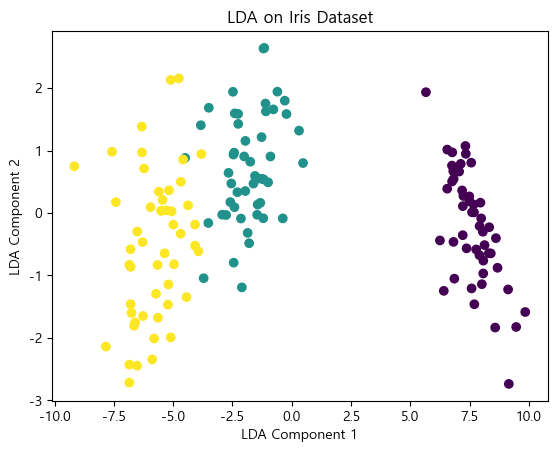

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# LDA 적용 (2차원으로 차원 축소)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y) # 지도학습 방식 (PCA는 비지도학습 방식)

# LDA 결과 시각화
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.title('LDA on Iris Dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

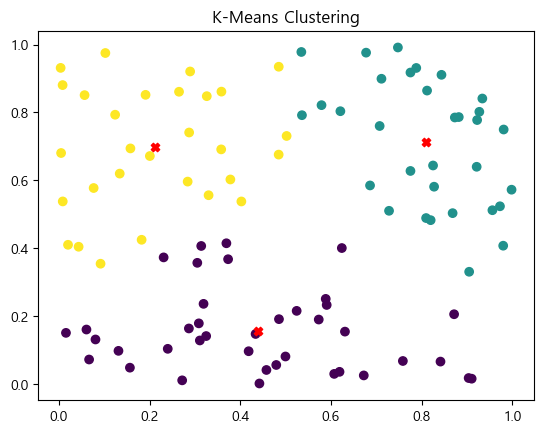

In [ ]:
# K-Means 군집

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.random.rand(100, 2)      # 100개의 2차원 데이터

# K-평균 군집 모델 학습
kmeans = KMeans(
    n_clusters=3,       # 클러스터 수는 3개
    random_state=42
)
kmeans.fit(X)

# 예측 및 시각화
labels = kmeans.predict(X)  # 새로운 데이터의 군집까지 자동으로 할당한다 
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(
    kmeans.cluster_centers_[:, 0], # n클러스터 3개이므로 중심점 3개의 X 좌표
    kmeans.cluster_centers_[:, 1], # n클러스터 3개이므로 중심점 3개의 Y 좌표
    color='red',    # 색상은 검정색
    marker='X'      # 마커는 x
    )
plt.title("K-Means Clustering")
plt.show()

In [19]:
kmeans.cluster_centers_

array([[0.43840569, 0.15516122],
       [0.81022942, 0.71238311],
       [0.21228822, 0.69705538]])

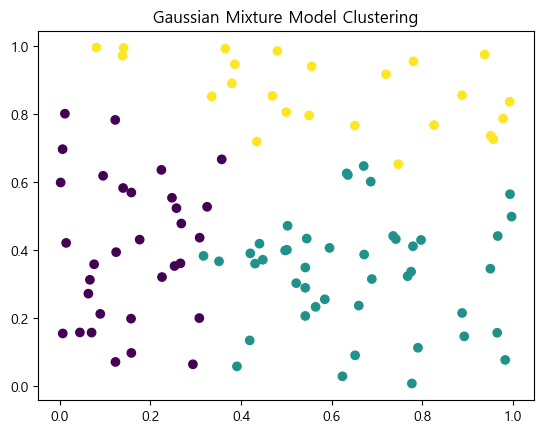

In [20]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.random.rand(100, 2)

# GMM 모델 학습
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# 예측 및 시각화
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.show()

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pandas as pd

# 예시 데이터 생성
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, 
                    centers=4, 
                    cluster_std=0.60,
                    random_state=42     # 군집이 퍼진 정도
                    )

# K-평균 군집화 모델 학습
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# 실루엣 계수 계산
silhouette_avg = silhouette_score(
                                X, 
                                kmeans.labels_ # 각 데이터가 어떤 클래스에 속하는지 결과
                            )
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.88


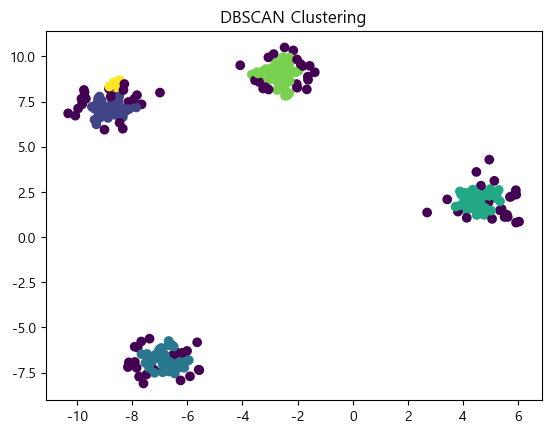

In [23]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 예시 데이터 생성
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# DBSCAN 군집화 모델 학습
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# 군집 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

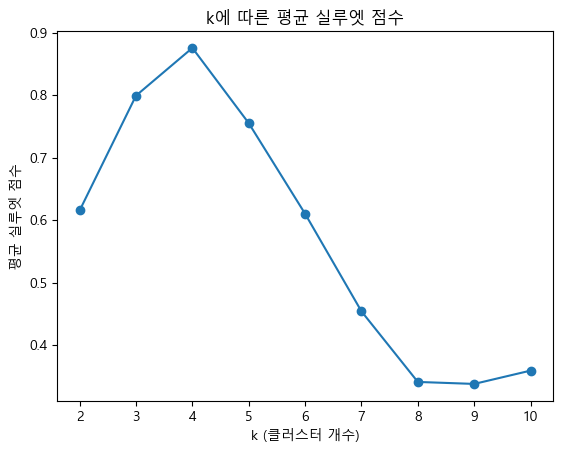

Silhouette Score (avg): 0.615


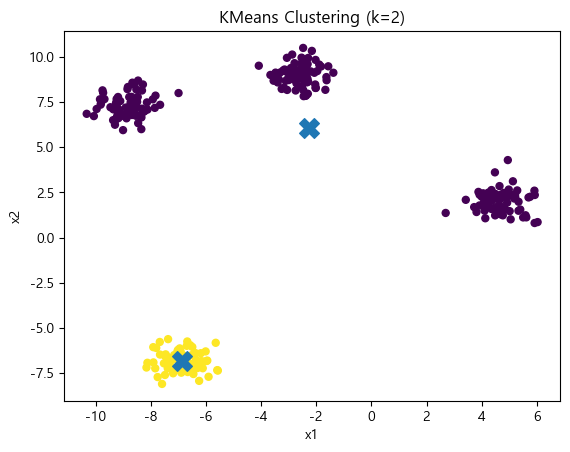

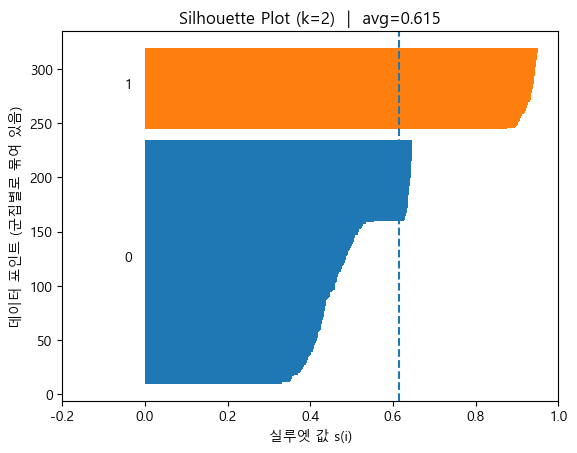

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# -----------------------------
# 1) 예시 데이터 (군집이 "원래" 4개인 데이터)
# -----------------------------
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# -----------------------------
# 2) (선택) k를 바꿔가며 실루엣 평균 비교 그래프
# -----------------------------
ks = range(2, 11)
sil_scores = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

plt.figure()
plt.plot(list(ks), sil_scores, marker="o")
plt.xticks(list(ks))
plt.xlabel("k (클러스터 개수)")
plt.ylabel("평균 실루엣 점수")
plt.title("k에 따른 평균 실루엣 점수")
plt.show()

# -----------------------------
# 3) 하나의 k를 정해서 (군집 그림 + 실루엣 그림) 보기
# -----------------------------
k = 2  # 여기만 바꾸면서 비교하면 됨
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

sil_avg = silhouette_score(X, labels)
sil_vals = silhouette_samples(X, labels)

print(f"Silhouette Score (avg): {sil_avg:.3f}")

# (A) 군집 결과 산점도
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels, s=25)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker="X", s=200)  # 중심점
plt.title(f"KMeans Clustering (k={k})")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# (B) 실루엣 플롯 (각 점의 s(i) 값이 막대처럼 보임)
plt.figure()
y_lower = 10
for cluster_id in range(k):
    cluster_sil = sil_vals[labels == cluster_id]
    cluster_sil.sort()
    size = cluster_sil.shape[0]

    y_upper = y_lower + size
    y = np.arange(y_lower, y_upper)
    plt.barh(y, cluster_sil, height=1.0)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(cluster_id))
    y_lower = y_upper + 10  # 군집 사이 띄우기

plt.axvline(sil_avg, linestyle="--")  # 평균 실루엣 점수 위치
plt.xlim([-0.2, 1.0])
plt.xlabel("실루엣 값 s(i)")
plt.ylabel("데이터 포인트 (군집별로 묶여 있음)")
plt.title(f"Silhouette Plot (k={k})  |  avg={sil_avg:.3f}")
plt.show()

# -----------------------------
# 해석 팁(중요)
# - 막대가 오른쪽(1쪽)으로 길수록: "내 군집에 잘 속함"
# - 0 근처: 경계에 걸친 점
# - 음수(왼쪽): 다른 군집이 더 가까운 점(배정이 이상할 가능성 큼)
# -----------------------------


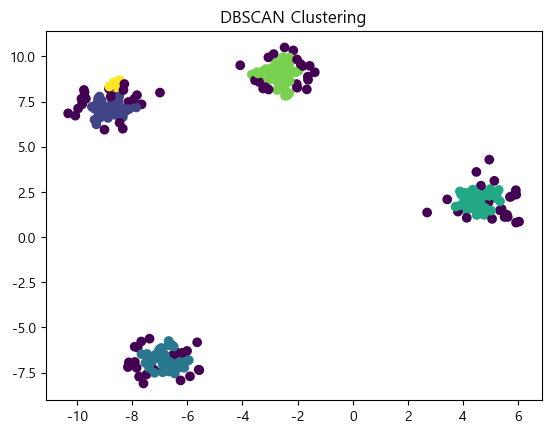

In [27]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 예시 데이터 생성
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# DBSCAN 군집화 모델 학습
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# 군집 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
# joblib설치
# !pip install joblib

In [3]:
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 예제 모델 생성
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# 모델 저장
dump(model, "./models/model.joblib")

['./models/model.joblib']

In [5]:
from joblib import Memory

memory = Memory("./cachedir", verbose=0)

@memory.cache
def slow_function(x):
    import time
    time.sleep(2)  # 일부러 연산을 느리게 만듦
    return x ** 2

print(slow_function(10))  # 처음 실행 시 2초 걸림
print(slow_function(10))  # 캐싱된 결과를 사용하여 즉시 실행됨

100
100


In [9]:
import pandas as pd
# 콘텐츠 기반 필터링
movie_data = {
    'movie_id': [101, 102, 103, 104, 105],
    'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E'],
    'genre': ['Action', 'Comedy', 'Action', 'Comedy', 'Drama']
}

user_ratings = {
    'user_id': [1, 1, 1, 2, 2],
    'movie_id': [101, 102, 103, 104, 105],
    'rating': [5, 3, 4, 4, 5]
}

movie_df = pd.DataFrame(movie_data)
user_rating_df = pd.DataFrame(user_ratings)
user_ratings

{'user_id': [1, 1, 1, 2, 2],
 'movie_id': [101, 102, 103, 104, 105],
 'rating': [5, 3, 4, 4, 5]}

In [10]:
movie_df['genre_encoded'] = pd.get_dummies(movie_df['genre']).values.tolist()

In [11]:
movie_df

,movie_id,title,genre,genre_encoded
0,101,Movie A,Action,"[True, False, False]"
1,102,Movie B,Comedy,"[False, True, False]"
2,103,Movie C,Action,"[True, False, False]"
3,104,Movie D,Comedy,"[False, True, False]"
4,105,Movie E,Drama,"[False, False, True]"


In [12]:
target_user_ratings = user_rating_df[user_rating_df['user_id']==1]

In [13]:
target_user_ratings

,user_id,movie_id,rating
0,1,101,5
1,1,102,3
2,1,103,4


In [14]:
rated_movies = movie_df[movie_df['movie_id'].isin(target_user_ratings['movie_id'])]
rated_movies

,movie_id,title,genre,genre_encoded
0,101,Movie A,Action,"[True, False, False]"
1,102,Movie B,Comedy,"[False, True, False]"
2,103,Movie C,Action,"[True, False, False]"


In [20]:
import numpy as np
user_genre_profile = np.mean(np.array(rated_movies['genre_encoded'].tolist()), axis=0)

In [21]:
# 나머지 영화와의 유사도 계산
movie_df['similarity'] = movie_df['genre_encoded'].apply(lambda x:np.dot(user_genre_profile,x))
movie_df

,movie_id,title,genre,genre_encoded,similarity
0,101,Movie A,Action,"[True, False, False]",0.666667
1,102,Movie B,Comedy,"[False, True, False]",0.333333
2,103,Movie C,Action,"[True, False, False]",0.666667
3,104,Movie D,Comedy,"[False, True, False]",0.333333
4,105,Movie E,Drama,"[False, False, True]",0.000000


In [23]:
# 사용자가 보지 않은 영화중에서 추천할 영화 선택 (~ : ! = 부정형, True False를 뒤집는다)
recommendation = movie_df[~movie_df['movie_id'].isin(target_user_ratings['movie_id'])].sort_values(by='similarity',ascending=False)
recommendation

,movie_id,title,genre,genre_encoded,similarity
3,104,Movie D,Comedy,"[False, True, False]",0.333333
4,105,Movie E,Drama,"[False, False, True]",0.000000


In [26]:
print("추천영화는")
print(f"{recommendation[['title', 'similarity']]}")

추천영화는
     title  similarity
3  Movie D    0.333333
4  Movie E    0.000000


In [27]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [28]:
data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 4, 4, 4],
    'item_id': [101, 102, 103, 101, 104, 101, 102, 103, 104, 105],
    'rating': [5, 3, 4, 4, 5, 3, 4, 2, 4, 5]
}

df = pd.DataFrame(data)
df

,user_id,item_id,rating
0,1,101,5
1,1,102,3
2,1,103,4
3,2,101,4
4,2,104,5
5,3,101,3
6,3,102,4
7,4,103,2
8,4,104,4
9,4,105,5


In [29]:
user_item_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating').fillna(0)
user_item_matrix


item_id,101,102,103,104,105
user_id,,,,,
1,5.0,3.0,4.0,0.0,0.0
2,4.0,0.0,0.0,5.0,0.0
3,3.0,4.0,0.0,0.0,0.0
4,0.0,0.0,2.0,4.0,5.0


In [30]:
user_similarity = cosine_similarity(user_item_matrix)
user_similarity

array([[1.        , 0.4417261 , 0.76367532, 0.16865481],
       [0.4417261 , 1.        , 0.37481703, 0.4656202 ],
       [0.76367532, 0.37481703, 1.        , 0.        ],
       [0.16865481, 0.4656202 , 0.        , 1.        ]])

In [31]:
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_similarity_df

user_id,1,2,3,4
user_id,,,,
1,1.000000,0.441726,0.763675,0.168655
2,0.441726,1.000000,0.374817,0.465620
3,0.763675,0.374817,1.000000,0.000000
4,0.168655,0.465620,0.000000,1.000000


자기 자신을 제외한 나머지 유사도중 가장 높은 유사도가 가장 비슷한 사람

In [47]:
# 특정 사용자의 추천 아이템 (user_id = 1)
target_user =1 
similar_users = user_similarity_df[target_user].sort_values(ascending=False).index[1:]

In [41]:
similar_users.to_numpy()

array([3, 2, 4])

In [ ]:
# target_user =user_item_matrix.loc[target_user,user_item_matrix.loc[target_user]>0].index


In [48]:
# 유사한 사용자의 아이템 중에서, target_user가 평가하지 않은 아이템 추천
items_rated_by_target = user_item_matrix.loc[target_user, user_item_matrix.loc[target_user] > 0].index

In [50]:
for user in similar_users:
    items = user_item_matrix.loc[user, user_item_matrix.loc[user] > 0].index
    print(items)

Index([101, 102], dtype='int64', name='item_id')
Index([101, 104], dtype='int64', name='item_id')
Index([103, 104, 105], dtype='int64', name='item_id')


In [51]:
new_recommendations = [item for item in items if item not in items_rated_by_target]

In [ ]:
def solution(n, k):
    a=[]
    b=k
    for i in range(n):
        if i == k:
            
solution(10,3)

3
3
3
6
6
6
12
12
12
12
